# Customer Segmentation Analysis

### Summary
I started by exploring and cleaning a dataset of 9,800 product orders. I constructed a recency, frequency, and montetary analysis from this data to segment our customers. Utilizing a machine learning algorithm, I identified our low, mid, and high value customers. Once I classifed our customer base, I calculated the customer lifetime value of each group. 

The primary difference between low and mid tier customers is the time since their last purchase. Mid tier customers have purchased products more recently. Converting low tier customers to mid tier customers will generate the largest increase in customer lifetime value. I identified the top products our low tier customers purchased and proposed we offer a one-time discount on these products for those customers to encourage them to start making purchases from our company again. 

Additionally, I identified the products that generate the most sales amongst our high value customers. We can consider offering a loyalty program to these customers to encourage them to continue buying these products. We also may consider expanding our product offerings for these sub-categories as they generate the most sales amongst our best customers. 

Another option is asking for customer feedback to understand the best aspects of these products so we can better market them to our low and mid tier customers.

Furthermore, I can import our product order dataframe with the newly added customer value chorts into a visualization tool like Looker to identify more trends and insights. I can present a variety of visualizations showcasing sales performance on a regional basis, within customer segments, or dive deeper into category and sub-category product trends to name a few. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Data/superstore-sales.csv', parse_dates=['Order Date', 'Ship Date'], dayfirst=True)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# Do not need Row ID
df.drop('Row ID', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [6]:
# Find null values in "Postal Code"
df[df["Postal Code"].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
# Confirm all Burlington, Vermont postal codes are null
df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [8]:
# Replace null 'Postal Code' in Burlington, Vermont with a Burlington, VT Postal Code
df["Postal Code"].fillna("05401", inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   object        
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [10]:
df.describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [11]:
# Check for duplicate values
df.loc[df.duplicated(), :]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


Since there is only 1 duplicate and it's for chairs, we are going to leave it in the dataset. It's reasonable to think someone ordered multiple chairs. Overall, it appears there are no erroneous duplicates in the dataset.

In [12]:
# Remove decimals from "Postal Code" column so its only 5 digits
df = df.astype({'Postal Code':'string'})

In [13]:
clean_postal = df['Postal Code']

In [14]:
PostalCode = []
for p in clean_postal:
    PostalCode.append(p[:5])

In [15]:
PostalCode[:5]

['42420', '42420', '90036', '33311', '33311']

In [16]:
df.drop(['Postal Code'], axis=1, inplace=True)

In [17]:
df.insert(loc=9, column='Postal Code', value=PostalCode)

In [18]:
# Round sales column to two decimals
df['Sales'] = df['Sales'].round(decimals=2)

In [19]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,90036,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,33311,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,33311,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [20]:
# Explore the sales data to see if there appears to be any missing dates or input errors
sales = df.groupby(df['Order Date'])['Sales'].sum()
sales

Order Date
2015-01-03      16.45
2015-01-04     288.06
2015-01-05      19.54
2015-01-06    4407.10
2015-01-07      87.16
               ...   
2018-12-26     814.59
2018-12-27     177.64
2018-12-28    1657.34
2018-12-29    2915.54
2018-12-30     713.79
Name: Sales, Length: 1230, dtype: float64

<AxesSubplot: xlabel='Order Date'>

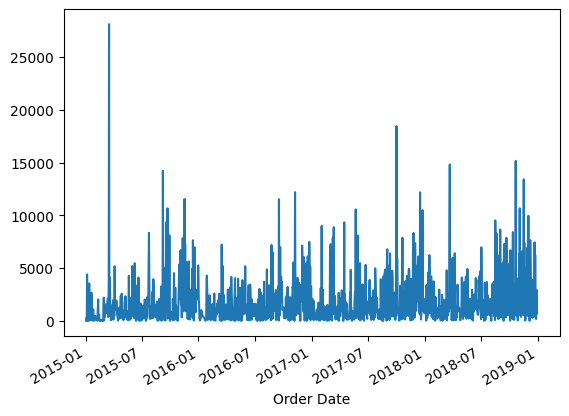

In [21]:
sales.plot()

In [22]:
from datetime import datetime 

mindate = df['Order Date'].min()
maxdate = df['Order Date'].max()
min = sales.min()
max = sales.max()
range = max-min

print("The sales data shows sales from {} to {}. The amount of sales in a day ranges from ${:,.2f} to ${:,.2f}. There are no order dates without sales.".format(mindate.strftime("%B %-d, %Y"), maxdate.strftime("%B %-d, %Y"), min, max))

The sales data shows sales from January 3, 2015 to December 30, 2018. The amount of sales in a day ranges from $2.02 to $28,106.73. There are no order dates without sales.


{'whiskers': [<matplotlib.lines.Line2D at 0x15d6949a0>,
 'caps': [<matplotlib.lines.Line2D at 0x15d694ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d694700>],
 'medians': [<matplotlib.lines.Line2D at 0x15d695420>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d6956c0>],
 'means': []}

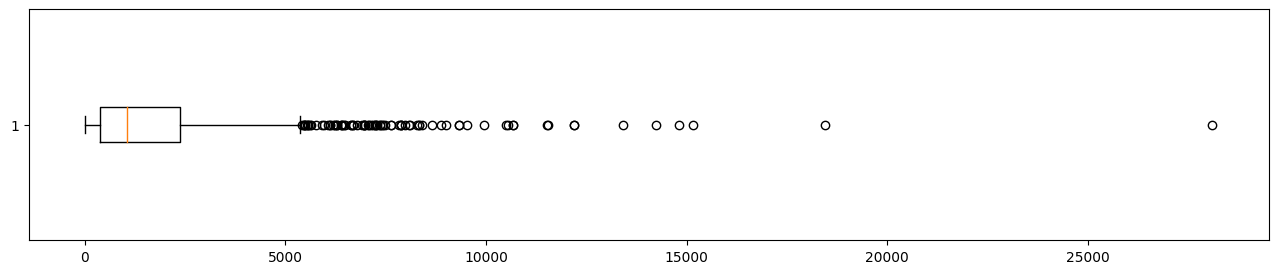

In [23]:
# Check sales data to see if any outliers may be errors
fig, ax = plt.subplots(figsize=(16, 3))
plt.boxplot(sales, vert=False)

In [24]:
# Check order dates that have sales over $15,000
high_sales = sales[sales > 15000].sort_values(ascending=False)
high_sales

Order Date
2015-03-18    28106.73
2017-10-02    18452.97
2018-10-22    15158.88
Name: Sales, dtype: float64

In [25]:
target_dates = high_sales.index.to_list()
high_sales_dates = df.loc[df['Order Date'].isin(target_dates)]
high_sales_dates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
2623,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,10024,New York,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97
2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,10024,New York,East,TEC-PH-10001494,Technology,Phones,Polycom CX600 IP Phone VoIP phone,2399.60
2625,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,10024,New York,East,OFF-EN-10002500,Office Supplies,Envelopes,Globe Weis Peel & Seel First Class Envelopes,63.90
2626,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,10024,New York,East,TEC-PH-10003800,Technology,Phones,i.Sound Portable Power - 8000 mAh,52.99
2696,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,32216,Florida,South,TEC-MA-10003626,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,821.30
2697,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,32216,Florida,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48
2698,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,32216,Florida,South,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,21.38
2699,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,32216,Florida,South,OFF-AR-10003183,Office Supplies,Art,Avery Fluorescent Highlighter Four-Color Set,8.02
2700,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,32216,Florida,South,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",30.77
2701,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,32216,Florida,South,OFF-FA-10003112,Office Supplies,Fasteners,Staples,18.94


The the order dates with the 3 highest sales all appear to be accurate. The high sales values are associated with technology purchases on these dates.

# Customer Segmentation Analysis
Now that the we have explored and cleaned the data, we will begin segmenting our customers to create personalized marketing, improve customer retention, and increase resource efficiency

In [26]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,90036,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,33311,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,33311,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [27]:
# Create pin date to calculate number of days from the customer's most recent purchase and the end of the dataset. 
pin_date = df['Order Date'].max() + dt.timedelta(days=1)

# Create Recency, Frequency, and Monetary Value dataframe grouped by customer ID
rfm = df.groupby(['Customer ID']).agg({
    'Order Date':lambda x : (pin_date-x.max()).days,
    'Order ID' : 'count',
    'Sales' : 'sum'
})
rfm = rfm.rename(columns={'Order Date':'Recency','Order ID':'Frequency','Sales':'Monetary'})

In [28]:
rfm

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,11,5563.56
AA-10375,20,15,1056.39
AA-10480,260,12,1790.51
AA-10645,56,18,5086.93
AB-10015,416,6,886.15
...,...,...,...
XP-21865,44,28,2374.66
YC-21895,5,8,5454.35
YS-21880,10,12,6720.44


In [29]:
rfm.shape

(793, 3)

We have 793 unique customers.

In [30]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    793 non-null    int64  
 1   Frequency  793 non-null    int64  
 2   Monetary   793 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 24.8+ KB


In [31]:
rfm.describe()

,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,149.286255,12.358134,2851.874590
std,187.081466,6.162600,2620.668725
min,1.000000,1.000000,4.830000
25%,31.000000,8.000000,1081.470000
50%,76.000000,11.000000,2214.990000
75%,185.000000,16.000000,3670.270000
max,1166.000000,35.000000,25043.070000


array([[<AxesSubplot: title={'center': 'Recency'}>,
        <AxesSubplot: title={'center': 'Frequency'}>],
       [<AxesSubplot: title={'center': 'Monetary'}>, <AxesSubplot: >]],
      dtype=object)

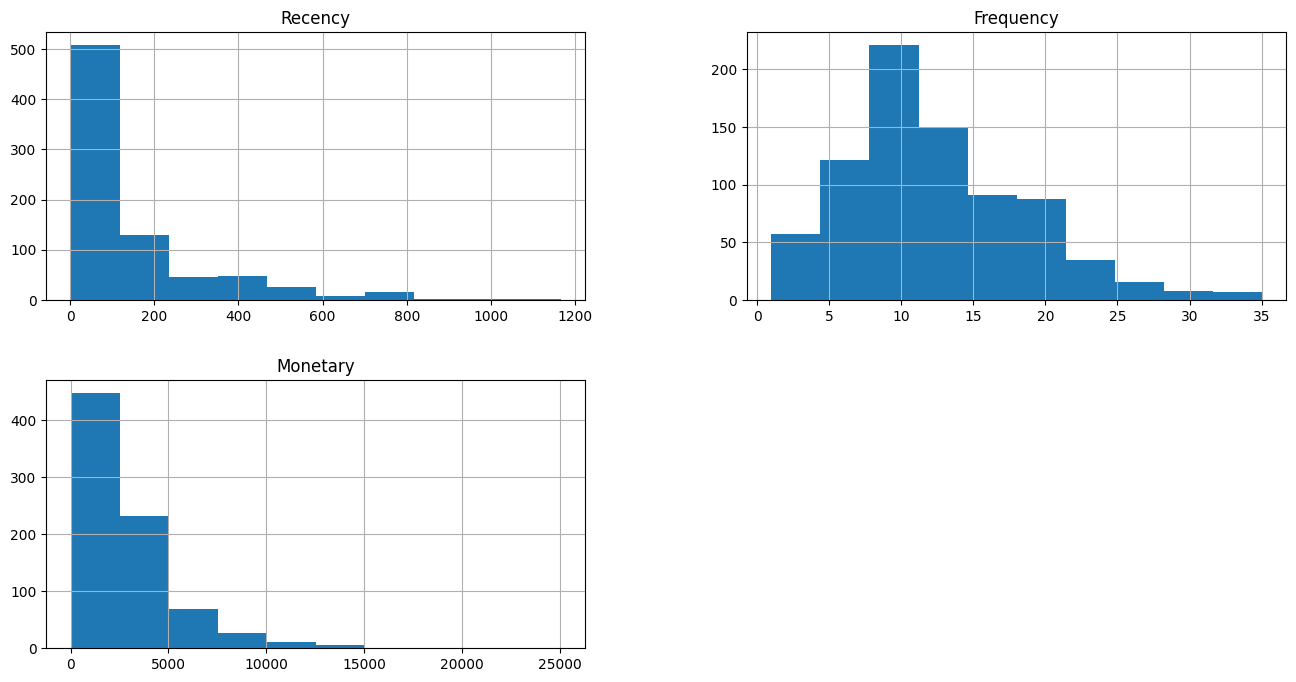

In [32]:
# Examine the distribution of the recency, frequency, and monetary data
rfm.hist(figsize=(16,8))

array([[<AxesSubplot: title={'center': 'Recency'}>,
        <AxesSubplot: title={'center': 'Frequency'}>],
       [<AxesSubplot: title={'center': 'Monetary'}>, <AxesSubplot: >]],
      dtype=object)

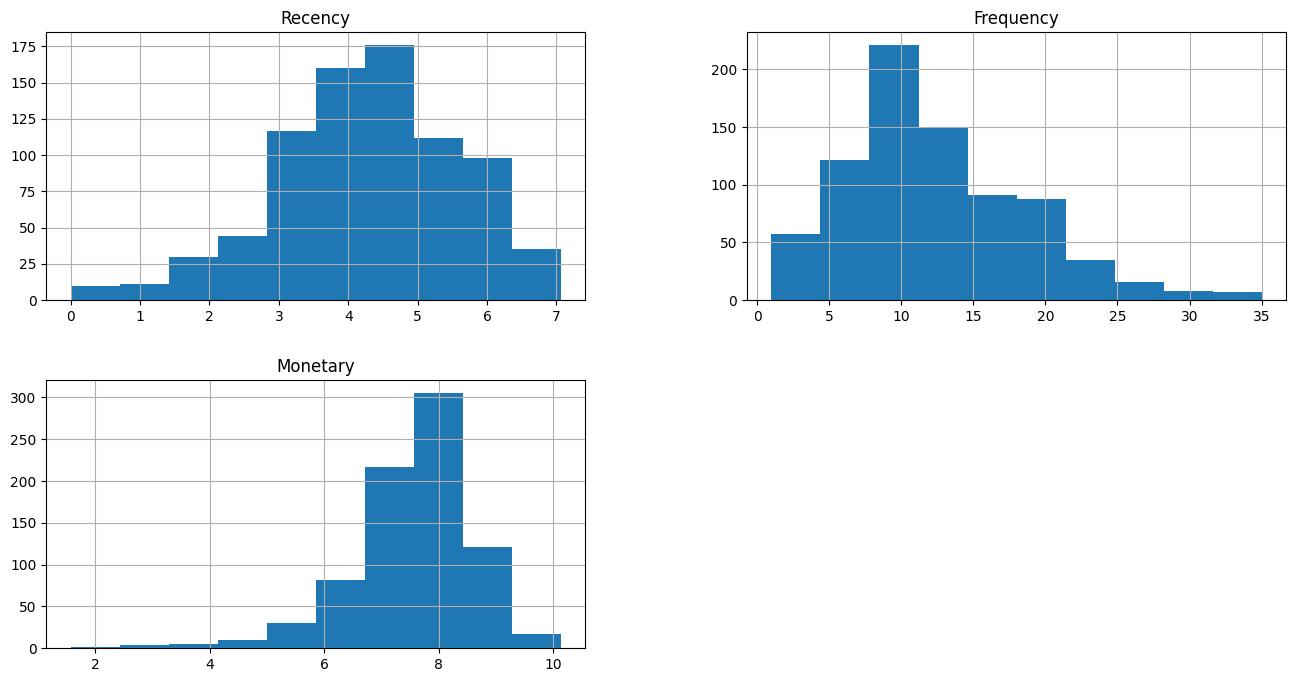

In [33]:
# Recency and monetary are skewed right so we will normalize the data by applying the log function. Frequency has some right skew but not enough skew to warrant applying the log function.
rfm['Recency'] = rfm['Recency'].apply(np.log, axis=1)
rfm['Monetary'] = rfm['Monetary'].apply(np.log, axis=1)
rfm.hist(figsize=(16,8))

In [34]:
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm)

Text(0, 0.5, 'WCSS Score')

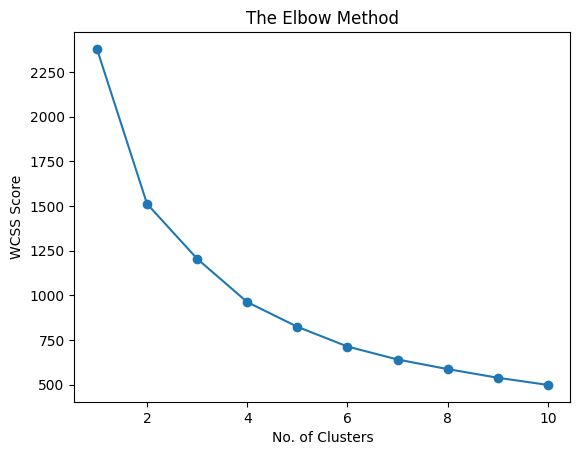

In [35]:
# Use elbow method to determine number of clusters for segmenting customers
wcss = []
for i in np.arange(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=0)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.plot(np.arange(1,11), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS Score")

In [36]:
# The elbow method suggests clustering the data in 3 or 4 clusters as it appears to be the point where the decrease in within-cluster sum of squares (WCSS) begins to flatten. We decided to choose 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++')
kmeans.fit(scaled)
rfm['Clusters']=(kmeans.labels_ + 1)

In [37]:
rfm

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
AA-10315,5.220356,11,8.623993,2
AA-10375,2.995732,15,6.962613,3
AA-10480,5.560682,12,7.490256,1
AA-10645,4.025352,18,8.534430,2
AB-10015,6.030685,6,6.786886,1
...,...,...,...,...
XP-21865,3.784190,28,7.772610,2
YC-21895,1.609438,8,8.604169,3
YS-21880,2.302585,12,8.812909,3


In [38]:
# After segmenting the customers into 3 groups, we will explore what the segments represent
customer_value = rfm.groupby(['Clusters'])[['Recency','Frequency','Monetary']].mean()
customer_value

,Recency,Frequency,Monetary
Clusters,,,
1,5.280668,7.784053,6.733633
2,4.246787,18.512821,8.353841
3,2.952824,10.972603,7.603176


In [40]:
# We identified customers in segment 2 as high value, customers in segment 3 as mid value and customers in segment 1 as low value.
def func(row):
    if row['Clusters'] == 2:
        return 'High'
    elif row['Clusters'] == 3:
        return 'Mid'
    else:
        return 'Low'

In [41]:
rfm['Customer Value']=rfm.apply(func, axis=1)

In [42]:
rfm

,Recency,Frequency,Monetary,Clusters,Customer Value
Customer ID,,,,,
AA-10315,5.220356,11,8.623993,2,High
AA-10375,2.995732,15,6.962613,3,Mid
AA-10480,5.560682,12,7.490256,1,Low
AA-10645,4.025352,18,8.534430,2,High
AB-10015,6.030685,6,6.786886,1,Low
...,...,...,...,...,...
XP-21865,3.784190,28,7.772610,2,High
YC-21895,1.609438,8,8.604169,3,Mid
YS-21880,2.302585,12,8.812909,3,Mid


In [43]:
# Present number of customers in each segment
rfm_values = rfm['Customer Value'].value_counts().sort_values(ascending=False)
rfm_values

Low     301
High    273
Mid     219
Name: Customer Value, dtype: int64

<AxesSubplot: xlabel='Frequency', ylabel='Recency'>

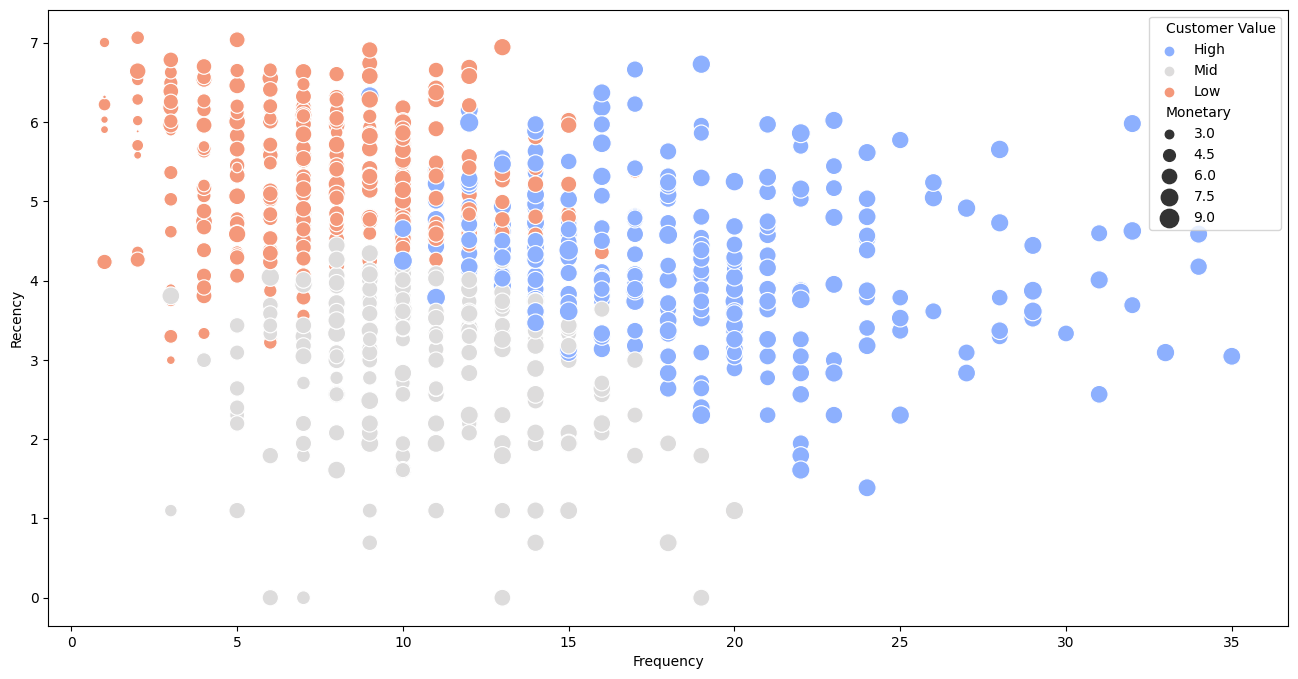

In [44]:
# Create a scatter plot of the customer value clusters
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Frequency', y='Recency', size='Monetary', hue='Customer Value', data=rfm, sizes=(5,200), palette='coolwarm')

The scatter plot above shows us that our high value customers are the ones who make the most frequent purchases. There is little relationship in the recency of our high value customers. Most purchases are around the same monetary value; and thus, did not have a huge affect on the clusters. Purchase frequency is the primary determinant between high value customers compared to low or mid value customers. Mid value customers have made less frequent purchases compared to high value customers, but have made purchases more recently than low value customers. Low value customers are the ones who have made few purchases and have not made a purchase recently. 

In [45]:
# Add our customer segments to the main dataframe to develop insights regarding our customer segments.
df = pd.merge(df, rfm, on='Customer ID', how='left')
df['Year'] = df['Order Date'].dt.year
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,...,Category,Sub-Category,Product Name,Sales,Recency,Frequency,Monetary,Clusters,Customer Value,Year
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,5.826000,5,7.046456,1,Low,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,5.826000,5,7.046456,1,Low,2017
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.995732,9,7.020620,3,Mid,2017
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,3.401197,15,7.864259,3,Mid,2016
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,3.401197,15,7.864259,3,Mid,2016


In [46]:
# Calculate average customer lifespan (ACL) by customer value cohort
acl = df.groupby(['Customer ID']).agg({
                  'Order Date' : ['min', 'max']
                  })
acl.columns = ['Min', 'Max']
acl['Lifespan'] = acl['Max'] - acl['Min']
acl['Lifespan'] = acl['Lifespan'].dt.days
acl = pd.merge(acl, rfm, on='Customer ID', how='left')
acl[['Lifespan', 'Customer Value']]

,Lifespan,Customer Value
Customer ID,,
AA-10315,1186,High
AA-10375,1330,Mid
AA-10480,1077,Low
AA-10645,1232,High
AB-10015,996,Low
...,...,...
XP-21865,1397,High
YC-21895,1135,Mid
YS-21880,1074,Mid


In [47]:
# Find mean customer lifespan for each customer value cohort. Convert lifespan from days to years
high_value_lifespan = (acl['Lifespan'].loc[acl['Customer Value'] == 'High'].mean()) / 365
mid_value_lifespan = (acl['Lifespan'].loc[acl['Customer Value'] == 'Mid'].mean()) / 365
low_value_lifespan = (acl['Lifespan'].loc[acl['Customer Value'] == 'Low'].mean()) / 365

In [48]:
# Create df of 2018 orders
df2018 = df.loc[df['Year'] == 2018]

In [49]:
# Create customer lifetime value (CLV) table
clv = df2018.groupby(['Customer Value']).agg({
    'Customer ID' : 'nunique',
    'Order ID' : 'nunique',
    'Sales' : 'sum'
})
clv.rename(columns={'Customer ID': 'Customer Count', 'Order ID': 'Order Count'}, inplace=True)

In [50]:
clv['Avg Sales Value'] = clv['Sales'] / clv['Order Count']
clv['Avg Purchase Frequency'] = clv['Order Count'] / clv['Customer Count']
clv['Avg Lifespan (Years)'] = [high_value_lifespan, low_value_lifespan, mid_value_lifespan]
clv['Customer Lifetime Value'] = clv['Avg Sales Value'] * clv['Avg Purchase Frequency'] * clv['Avg Lifespan (Years)']
clv

,Customer Count,Order Count,Sales,Avg Sales Value,Avg Purchase Frequency,Avg Lifespan (Years),Customer Lifetime Value
Customer Value,,,,,,,
High,259,735,395310.36,537.837224,2.837838,3.004084,4585.118630
Low,212,359,88071.77,245.325265,1.693396,2.288818,950.850287
Mid,219,567,238669.69,420.934198,2.589041,2.962782,3228.887323


In [51]:
high_clv = clv.loc['High', 'Customer Lifetime Value']
mid_clv = clv.loc['Mid', 'Customer Lifetime Value']
low_clv = clv.loc['Low', 'Customer Lifetime Value']
dif_mid_low = mid_clv - low_clv

print("Our high value customers have a customer lifetime value of ${:,.0f}, while mid value customers have a CLV of ${:,.0f} and low value have a CLV of ${:,.0f}. Converting low value customers to mid value customers will increase their CLV by ${:,.0f}. As we saw earlier, the primary difference between low value and mid value is that low value have not made a purchase recently. Let's see what products low value customers purchase.".format(high_clv, mid_clv, low_clv, dif_mid_low))

Our high value customers have a customer lifetime value of $4,585, while mid value customers have a CLV of $3,229 and low value have a CLV of $951. Converting low value customers to mid value customers will increase their CLV by $2,278. As we saw earlier, the primary difference between low value and mid value is that low value have not made a purchase recently. Let's see what products low value customers purchase.


In [52]:
df_low = df.copy()
df_low = df_low[df_low['Customer Value'] == 'Low']
df_low.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,...,Category,Sub-Category,Product Name,Sales,Recency,Frequency,Monetary,Clusters,Customer Value,Year
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,5.826000,5,7.046456,1,Low,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,5.826000,5,7.046456,1,Low,2017
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,28027,...,Office Supplies,Paper,Xerox 1967,15.55,5.560682,12,7.490256,1,Low,2018
18,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,94109,...,Office Supplies,Art,Newell 341,8.56,5.313206,9,7.309172,1,Low,2015
19,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,94109,...,Technology,Phones,Cisco SPA 501G IP Phone,213.48,5.313206,9,7.309172,1,Low,2015


In [53]:
df_low['Sub-Category'].value_counts()

Binders        385
Paper          325
Furnishings    227
Art            208
Storage        194
Phones         181
Accessories    170
Chairs         130
Appliances     116
Labels         100
Tables          71
Bookcases       66
Envelopes       55
Fasteners       50
Supplies        44
Machines        12
Copiers          9
Name: Sub-Category, dtype: int64

We can see the top 5 sub-category purchases of our low value customers were binders, paper, furnishings, art, and storage. These customers as whole have not made a recent purchase. Since several of these items wear down over time or get used, we should consider offering them one-time discounted pricing for these items to encourage purchasing our products again. We also may consider asking for customer feedback to better understand why they have not made a recent purchase. 

In [54]:
# Let's see what products our high value customers purchase
df_high = df.copy()
df_high = df_high[df_high['Customer Value'] == 'High']
df_high['Sub-Category'].value_counts()

Binders        742
Paper          671
Furnishings    484
Phones         462
Storage        424
Accessories    406
Art            393
Chairs         330
Appliances     230
Labels         173
Tables         161
Envelopes      138
Fasteners      118
Bookcases      105
Supplies        96
Machines        82
Copiers         39
Name: Sub-Category, dtype: int64

In [55]:
# Let's see what products our high value customers spend the most on
high_product_sales = df_high.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
high_product_sales

Sub-Category
Chairs         193326.92
Phones         177327.33
Machines       150853.14
Tables         121444.90
Storage        121139.97
Binders        113691.26
Copiers        109258.84
Accessories     85623.74
Bookcases       60139.81
Appliances      58496.32
Furnishings     47081.24
Paper           41078.25
Supplies        37728.96
Art             13252.14
Envelopes        7615.09
Labels           5655.59
Fasteners        1642.70
Name: Sales, dtype: float64

Our high value customers spend the most on chairs, phones, machines, tables, and storage. We can consider offering a loyalty program to these customers to encourage them to continue buying these products. We also may consider expanding our product offerings for these sub-categories as they generate the most sales amongst our best customers. 

Another option is again asking for customer feedback to understand the best aspects of these products so we can better market them to our low and mid tier customers.